# Data Analysis

+ The csv files are generated and stored in the **Version 2** directory
+ Files are named after the seed that generated them *(will add the settings into the name too at a later point)*

### Libraries:
+ Pandas for importing managing the data in dataframes
+ Seaborn for visualising the data and generating plots
+ *Numpy may also be needed*
+ Pyplot to show plots

In [37]:
import pandas as pd 
# import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

# sns.set(rc={'figure.figsize':(16,9)})
plt.figure(figsize=(16,9))
plt.style.use('seaborn')

preset = "US-2007"
# preset = "US-2020"
# preset = "EU-2016"

<Figure size 1152x648 with 0 Axes>

### Importing the data
+ The ```seed_number``` variable holds the seed to load data from

In [52]:
def buildFilePath(seed, isTax, initial, increment, preset):
    filepath = '../Version 2/'
    filepath += 'seed-' + str(seed)
    filepath += '-tax-' if isTax else '-trade-'
    filepath += initial + '-inc-' + increment
    filepath += '-preset-' + preset + '.csv'
    return filepath

# Gets the dataframe from a filepath, updates the values to show per-year amounts, sets electricity to TWh from GWh, sets carbon to million tonnes
def getDF(filepath):
    print(filepath)
    df = pd.read_csv(filepath)
    df["Coal_Carbon"] = df["Coal_Carbon"] * 52 / 1000000
    df["Coal_Electricity"] = df["Coal_Electricity"] * 52 / 1000
    df["Gas_Carbon"] = df["Gas_Carbon"] * 52  / 1000000
    df["Gas_Electricity"] = df["Gas_Electricity"] * 52 / 1000
    df["Nuclear_Carbon"] = df["Nuclear_Carbon"] * 52 / 1000000
    df["Nuclear_Electricity"] = df["Nuclear_Electricity"] * 52 / 1000
    df["Wind_Carbon"] = df["Wind_Carbon"] * 52 / 1000000
    df["Wind_Electricity"] = df["Wind_Electricity"] * 52 / 1000
    return df

def plotCarbon(df):
    plt.style.use('seaborn')
    df.plot.area


def getCE(df):
    carbon = df.filter(regex='Carbon$', axis=1)
    electricity = df.filter(regex='Electricity$', axis=1)
    return carbon, electricity


In [73]:
def getDFwithInput():
    filepath = buildFilePath(seed, isTax, initial, increment, preset)
    df = getDF(filepath)
    return df

Text(0.5, 1.0, 'Electricity')

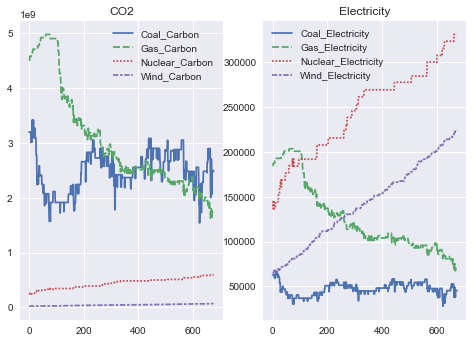

In [47]:
carbon, electricity = getCE(df)




fig, ax = plt.subplots(1, 2)
sns.lineplot(data = carbon, ax=ax[0]).set_title("CO2")
sns.lineplot(data = electricity, ax=ax[1]).set_title("Electricity")

# TAX

../Version 2/seed-1-tax-0100-inc-0050-preset-US-2007.csv


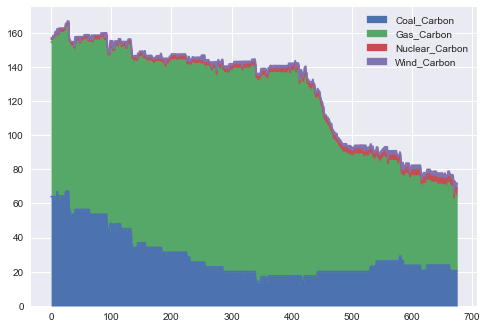

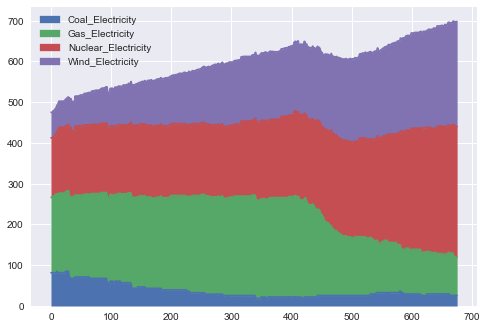

In [133]:
seed        = 1
isTax       = True
initial     = '0100'
increment   = '0050'
preset      = 'US-2007' 

carbon, electricity = getCE(getDFwithInput())

# fig, ax = plt.subplots(1, 2)
carbon.plot.area()
electricity.plot.area()

# TRADE

../Version 2/seed-1-trade-1x10-9-inc-1x10-6-preset-US-2007.csv


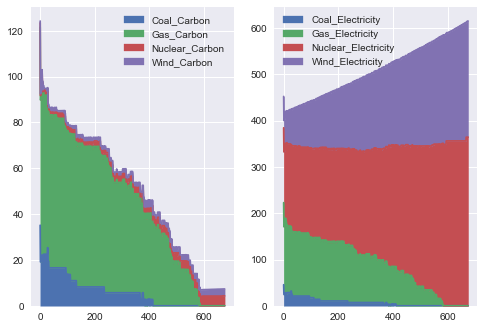

In [131]:
seed        = 1
isTax       = False
initial     = '1x10-9'
increment   = '1x10-6'
preset      = 'US-2007' 

carbon, electricity = getCE(getDFwithInput())

fig, ax = plt.subplots(1, 2)
carbon.plot.area(ax=ax[0])
electricity.plot.area(ax=ax[1])

In [176]:
seed        = 0
isTax       = True
initial     = '0100'
increment   = '0050'
preset      = 'US-2007' 

df = getDFwithInput()

for i in range(1,100):
    seed = i
    temp = getDFwithInput()
    df = pd.concat((df, temp))

# means = df.groupby(df.index).mean()
# sds   = df.groupby(df.index).std()

mean_c, mean_e = getCE(df)
sd_c, sd_e = getCE(means)

../Version 2/seed-0-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-1-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-2-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-3-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-4-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-5-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-6-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-7-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-8-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-9-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-10-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-11-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-12-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-13-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-14-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-15-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-16-tax-0100-inc-0050-preset-US-2007.csv
../Version 2/seed-17-tax

In [177]:
# mean_c.head()
mean_c = mean_c.sum(axis=1)
mean_e = mean_e.sum(axis=1)
sd_c = sd_c.sum(axis=1)
sd_e = sd_e.sum(axis=1)

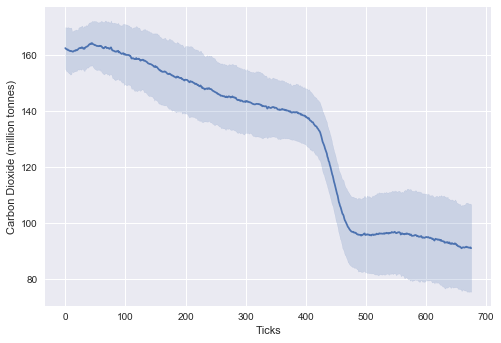

In [181]:
# ax1 = sns.lineplot (hue="region", data=mean_e, ci="sd")
ax2 = sns.lineplot (hue="region", data=mean_c, ci="sd")

# ax1.set(xlabel="Ticks", ylabel="Electricity production (TWh/year)")
ax2.set(xlabel="Ticks", ylabel="Carbon Dioxide (million tonnes)")

plt.show()

In [194]:
seed        = 0
isTax       = False
initial     = '1x10-9'
increment   = '1x10-6'
preset      = 'US-2007' 

df = getDFwithInput()

for i in range(1,100):
    seed = i
    temp = getDFwithInput()
    df = pd.concat((df, temp))

# means = df.groupby(df.index).mean()
# sds   = df.groupby(df.index).std()

mean_c2, mean_e = getCE(df)
sd_c, sd_e = getCE(means)

mean_c2 = mean_c2.sum(axis=1).drop(0)

../Version 2/seed-0-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-1-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-2-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-3-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-4-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-5-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-6-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-7-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-8-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-9-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-10-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-11-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-12-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-13-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-14-trade-1x10-9-inc-1x10-6-preset-US-2007.csv
../Version 2/seed-15-trade-1x10-9-inc-1x10-6-prese

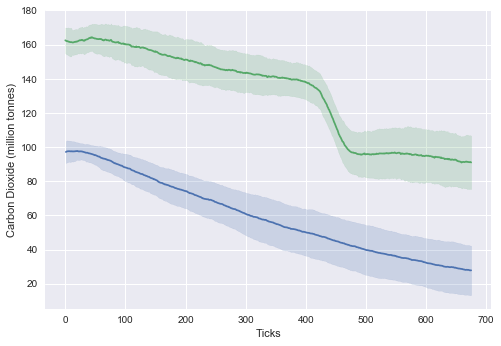

<Figure size 576x396 with 0 Axes>

In [196]:
# ax1 = sns.lineplot (hue="region", data=mean_e, ci="sd")
ax1 = sns.lineplot (hue="region", data=mean_c2, ci="sd")
ax2 = sns.lineplot (hue="region", data=mean_c, ci="sd")

# ax1.set(xlabel="Ticks", ylabel="Electricity production (TWh/year)")
ax2.set(xlabel="Ticks", ylabel="Carbon Dioxide (million tonnes)")

plt.show()
plt.savefig("co2-ticks.png", format="png")

In [188]:
mean_c2.head()

0    234.384534
1    107.326657
2    108.800995
3    106.010991
4    106.010991
dtype: float64